## Observations and Insights 

# Guidelines for Project 1

This document contains guidelines, requirements, and suggestions for Project 1.

## Team Effort

Before anything, remember that Projects are a **group effort**: Working closely with your teammates is a requirement. This both helps teach real-world collaborative workflows, and enables you to tackle more difficult problems than you'd be able to working alone.

In other words, working in groups allows you to **work smart** and **dream big**. Take advantage of it!

## Project Proposal

Before you start writing any code, your group should outline the scope and purpose of your project. This helps provide direction and prevent [scope creep](https://en.wikipedia.org/wiki/Scope_creep).

Write this as a brief summary of your interests and intent, including:

* The kind of data you'd like to work with/field you're interested in (e.g., geodata, weather data, etc.)

* The kinds of questions you'll be asking of that data

* Possible source for such data

In other words, write down what kind of data you plan to work with, and what kinds of questions you'd like to ask of it. This constitutes your Project Proposal/Outline, and should look something like this:

> Our project is to uncover patterns in criminal activity around Los Angeles. We'll examine relationships between types of crime and location; crime rates and times of day; trends in crime rates over the course of the year; and related questions, as the data admits.

## Finding Data

Once your group has written an outline, it's time to start hunting for data. You are free to use data from any source, but we recommend the following curated sources of high-quality data:

* [data.world](https://data.world/)

* [Kaggle](https://www.kaggle.com/)

* [Data.gov](https://www.data.gov)

* [Public APIs](https://github.com/abhishekbanthia/Public-APIs)

* [Awesome-APIs List](https://github.com/Kikobeats/awesome-api)

* [Medium APIs List](https://medium.com/@benjamin_libor/a-curated-collection-of-over-150-apis-to-build-great-products-fdcfa0f361bc)

Chances are you'll have to update your Project Outline as you explore the available data. **This is fine**—adjustments like this are part of the process! Just make sure everyone in the group is up-to-speed on the goals of the project as you make changes.

Make sure that your data is not too large for local analysis. **Big Data** datasets are difficult to manage locally, so consider a subset of that data or a different dataset altogether.

## Data Cleanup & Analysis

With data in hand, it's time to tackle development and analysis. This is where the fun starts!

Inevitably, the analysis process can be broken into two broad phases: **Exploration & Cleanup** and **Analysis** proper.

As you've learned, you'll need to explore, clean, and reformat your data before you can begin to answer your research questions. We recommend keeping track of these exploration and cleanup steps in a dedicated Jupyter Notebook, both for organization's sake and to make it easier to  present your work later.

Similarly, after you've massaged your data and are ready to start crunching numbers, you should keep track of your work in a Jupyter Notebook dedicated specifically to analysis.

During both phases, **don't forget to include plots**! Don't make the mistake of waiting to build figures until you're preparing your presentation. Creating them along the way can reveal insights and interesting trends in the data that you might not notice otherwise.

We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.

Finally, be sure that your projects meet the [technical requirements](TechnicalRequirements.md).

## Presentation

After you've analyzed your data to your satisfaction, you'll put together a presentation to show off your work, explain your process, and discuss your conclusions.

This presentation will be delivered as a slideshow, and should give your classmates and instructional staff an overview of your work. PowerPoint, Keynote, and Google Slides are all acceptable for building slides.

As long as your slides meet the [presentation requirements](PresentationRequirements.md), you are free to structure the presentation however you wish, but students are often successful with the format laid out in the [presentation guidelines](PresentationGuidelines.md).

- - -

### Copyright

Coding Boot Camp © 2017. All Rights Reserved.


# Technical Requirements

The technical requirements for Project 1 are as follows.

* [ ] Use Pandas to clean and format your data set(s)

* [ ] Create a Jupyter Notebook describing the **data exploration and cleanup** process

* [ ] Create a Jupyter Notebook illustrating the **final data analysis**

* [ ] Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)

* [ ] Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation

* [ ] Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions

* [ ] Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

- - -

### Copyright

Coding Boot Camp © 2017. All Rights Reserved.


In [11]:
! pip install census

In [12]:
# Install gmaps
! pip install gmaps

In [13]:
# enable nbextension for gmaps
! jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [14]:
# enable extenstion for widgets
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [15]:
! jupyter nbextension list

Known nbextensions:
  config dir: C:\Users\anand\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
      jupyter-js-widgets/extension enabled 
  config dir: C:\ProgramData\Anaconda3\etc\jupyter\nbconfig
    notebook section

      - Validating: ok
      - Validating: ok
      - Validating: ok



      jupyter-js-widgets/extension enabled 


In [16]:
# Install citipy
! pip install citipy

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import json
import requests
from census import Census
import csv
import os
import datetime
import gmaps
from citipy import citipy

# Import API key
from config import api_key, g_key

ModuleNotFoundError: No module named 'config'

In [ ]:
# Census API Key
c = Census(api_key, year=2017)

In [ ]:
#### Run Census Search to retrieve data on all zip codes (2017 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

In [9]:
census_pd = census_pd.dropna(how='any')

NameError: name 'census_pd' is not defined

In [10]:

#for index, row in census_pd.iterrows():
#    if row["Population"] == -666666666.0:
#        census_pd.loc[index,"Population"] = 0
#    if row["Median Age"] == -666666666.0:
#        census_pd.loc[index,"Median Age"] = 0
#    if row["Household Income"] == -666666666.0:
#        census_pd.loc[index,"Household Income"] = 0
#    if row["Per Capita Income"] == -666666666.0:
#        census_pd.loc[index,"Per Capita Income"] = 0
#    if row["Poverty Count"] == -666666666.0:
#        census_pd.loc[index,"Poverty Count"] = 0
#    if row["Poverty Rate"] == -666666666.0:
#        census_pd.loc[index,"Poverty Rate"] = 0        
#        school_summary_df.loc[index,"Per Student Budget"] = row["Total School Budget"] / row["Total Students"]

        
#        Population	Median Age	Household Income	Per Capita Income	Poverty Count	Poverty Rate
census_pd = census_pd[census_pd["Household Income"]>=0]

NameError: name 'census_pd' is not defined

In [12]:
us_counties_df = pd.read_csv("../PyCovid19/data/us_counties_nyt.csv")
us_counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [13]:
# Create a Group by data set of counties

grouped_us_counties = us_counties_df.groupby(
                        ["county", "state"], as_index=False).agg({
                                                             "cases": ["mean"],
                                                             "deaths": ["mean"]
                                                             }
                                                            )

# Assign column header names
grouped_us_counties.columns = ["County", "State", "Cases", "Deaths"]

# Display to output
grouped_us_counties

,County,State,Cases,Deaths
0,Abbeville,South Carolina,177.740933,3.347150
1,Acadia,Louisiana,1256.047368,43.947368
2,Accomack,Virginia,779.109375,11.432292
3,Ada,Idaho,4326.316583,47.025126
4,Adair,Iowa,19.605128,0.210256
...,...,...,...,...
3259,Yuma,Arizona,5707.489583,131.604167
3260,Yuma,Colorado,40.237113,0.025773
3261,Zapata,Texas,108.337143,1.371429
3262,Zavala,Texas,127.329268,4.506098


In [14]:
# read in text file
#"zip","lat","lng","city","state_id","state_name","zcta","parent_zcta","population",
#"density","county_fips","county_name","county_weights","county_names_all","county_fips_all",
#"imprecise","military","timezone"


#csv = pd.read_table('../PyCovid19/data/uszips.csv', converters={'zip': lambda x: str(x)})

#csv = csv[["zip","county_name"]]

# format
#csv.index = csv['zip']
#csv = csv[['county_name']]
#csv.fillna("-999", inplace=True)

#csv.sort_values('county_name')

# make dictionary 
#zip2county = csv.to_dict()['county_name']

# test
#zip2county_df = pd.DataFrame.from_dict( zip2county, orient='index' )

# Assign column header names

#zip2county_df.reset_index( inplace=True )
#zip2county_df.columns = ["Zipcode", "County"]
#zip2county_df.head()

#zip2county_df[zip2county_df["County"] == "Anchorage"]


In [15]:

csv = pd.read_table('../PyCovid19/data/zip_code_county.txt', converters={'zip_code': lambda x: str(x)})

csv = csv[['zip_code','county']]

# format
csv.index = csv['zip_code']
csv = csv[['county']]
csv.fillna("-999", inplace=True)

csv.sort_values('county')

# make dictionary 
zip2county = csv.to_dict()['county']

# test
zip2county_df = pd.DataFrame.from_dict( zip2county, orient='index' )

# Assign column header names

zip2county_df.reset_index( inplace=True )
zip2county_df.columns = ["Zipcode", "County"]
zip2county_df.head()

,Zipcode,County
0,00501,Suffolk
1,00544,Suffolk
2,01001,Hampden
3,01002,Hampshire
4,01003,Hampshire


In [16]:
# read in text file
zip_codes_states = '../PyCovid19/data/zip_codes_states.csv'
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
county_locations_df = pd.read_csv(zip_codes_states)

county_locations_df.drop("zip_code", axis=1, inplace=True)
county_locations_df.drop("city", axis=1, inplace=True)
county_locations_df = county_locations_df.dropna(how='any')
county_locations_df = county_locations_df.drop_duplicates()
county_locations_df.columns = ["Latitude", "Longitude", "State", "County"]
county_locations_df.head()

#county_locations_df[county_locations_df["State"] == "AK"]

,Latitude,Longitude,State,County
0,40.922326,-72.637078,NY,Suffolk
2,18.165273,-66.722583,PR,Adjuntas
3,18.393103,-67.180953,PR,Aguada
4,18.455913,-67.145780,PR,Aguadilla
5,18.493520,-67.135883,PR,Aguadilla


In [17]:
# Create a data frame of complete economic data, county, state, fips, cases, deaths

census_pd_with_county_df = pd.merge( census_pd, zip2county_df, how="inner", on=["Zipcode"])

census_pd_with_county_df.head()


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,County
0,01001,17537.0,45.8,57694.0,33135.0,1557.0,8.878371,Hampden
1,01002,30280.0,23.6,52379.0,27657.0,7851.0,25.928005,Hampshire
2,01003,11131.0,19.9,2499.0,4370.0,57.0,0.512083,Hampshire
3,01005,5014.0,45.4,70325.0,35334.0,307.0,6.122856,Worcester
4,01007,14906.0,43.8,86165.0,39308.0,855.0,5.735945,Hampshire


In [18]:
complete_data_us_df = pd.merge( census_pd_with_county_df, pd.DataFrame(grouped_us_counties),
                                             how="inner", on=["County"])
# Display to output
complete_data_us_df.head()

#complete_data_us_df[complete_data_us_df["State"] == "Alaska"].head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,County,State,Cases,Deaths
0,01001,17537.0,45.8,57694.0,33135.0,1557.0,8.878371,Hampden,Massachusetts,5508.619289,525.573604
1,01008,1272.0,49.9,62750.0,33933.0,89.0,6.996855,Hampden,Massachusetts,5508.619289,525.573604
2,01009,384.0,66.2,59440.0,26043.0,171.0,44.531250,Hampden,Massachusetts,5508.619289,525.573604
3,01010,3724.0,48.1,86523.0,39077.0,156.0,4.189044,Hampden,Massachusetts,5508.619289,525.573604
4,01011,1507.0,39.9,75263.0,30903.0,102.0,6.768414,Hampden,Massachusetts,5508.619289,525.573604


In [19]:
print(complete_data_us_df[complete_data_us_df["Household Income"] < 0])

Empty DataFrame
Columns: [Zipcode, Population, Median Age, Household Income, Per Capita Income, Poverty Count, Poverty Rate, County, State, Cases, Deaths]
Index: []


In [20]:
#print(complete_data_us_df[complete_data_us_df["State"] == "California"])

In [21]:
complete_data_us_county_df = complete_data_us_df.groupby(
                        ["County","State"], as_index=False).agg({
                                                         "Cases": ["mean"],
                                                         "Deaths": ["mean"],
                                                         "Population": ["mean"],
                                                         "Median Age": ["mean"],
                                                         "Household Income": ["mean"],
                                                         "Per Capita Income": ["mean"],
                                                         "Poverty Count": ["mean"],
                                                         "Poverty Rate": ["mean"]
                                                         }
                                                        )

# Assign column header names
complete_data_us_county_df.columns = ["County", "State","Cases","Morbidity",
                                      "Population", "Median Age",
                                      "Household Income", "Per Capita Income",
                                       "Poverty Count", "Poverty Rate"
                                     ]

#complete_data_us_county_df["Household Income"] = complete_data_us_county_df["Household Income"].map("{:,.2f}".format)
#complete_data_us_county_df["Per Capita Income"] = complete_data_us_county_df["Per Capita Income"].map("{:,.2f}".format)
#complete_data_us_county_df["Population"] = complete_data_us_county_df["Population"].map("{:,.0f}".format)
#complete_data_us_county_df["Poverty Rate"] = complete_data_us_county_df["Poverty Rate"].map("{:,.2f}".format)


# Population should be integer
# Use two decimal places for income

# Display to output
complete_data_us_county_df.head()

,County,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Abbeville,South Carolina,177.740933,3.347150,4085.400000,39.040000,35998.400000,18422.200000,953.000000,23.813052
1,Acadia,Louisiana,1256.047368,43.947368,6845.888889,34.577778,40353.222222,21836.444444,1483.777778,16.363707
2,Accomack,Virginia,779.109375,11.432292,1350.318182,48.272727,43199.409091,24157.590909,243.454545,15.311086
3,Ada,Idaho,4326.316583,47.025126,27100.928571,37.500000,61637.571429,33507.357143,3260.642857,11.744906
4,Adair,Iowa,19.605128,0.210256,4034.833333,41.838889,41356.055556,21945.166667,940.222222,21.369168


In [22]:
complete_data_us_state_df = complete_data_us_df.groupby(
                        ["State"], as_index=False).agg({ "Cases": ["mean"],
                                                         "Deaths": ["mean"],
                                                         "Population": ["mean"],
                                                         "Median Age": ["mean"],
                                                         "Household Income": ["mean"],
                                                         "Per Capita Income": ["mean"],
                                                         "Poverty Count": ["mean"],
                                                         "Poverty Rate": ["mean"]
                                                         }
                                                        )

# Assign column header names
complete_data_us_state_df.columns = ["State","Cases","Morbidity",
                                      "Population", "Median Age",
                                      "Household Income", "Per Capita Income",
                                       "Poverty Count", "Poverty Rate"
                                     ]

complete_data_us_state_df["Cases"] = complete_data_us_state_df["Cases"].astype(float)
complete_data_us_state_df["Cases"] = complete_data_us_state_df["Cases"].apply(np.floor)
complete_data_us_state_df["Morbidity"] = complete_data_us_state_df["Morbidity"].astype(float)
complete_data_us_state_df["Morbidity"] = complete_data_us_state_df["Morbidity"].apply(np.floor)
complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].astype(float)
complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].apply(np.floor)
complete_data_us_state_df["Household Income"] = complete_data_us_state_df["Household Income"].astype(float)
complete_data_us_state_df["Household Income"] = complete_data_us_state_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
complete_data_us_state_df["Median Age"] = complete_data_us_state_df["Median Age"].astype(float)
complete_data_us_state_df["Median Age"] = complete_data_us_state_df["Median Age"].apply(np.floor)
complete_data_us_state_df["Per Capita Income"] = complete_data_us_state_df["Per Capita Income"].astype(float)
complete_data_us_state_df["Per Capita Income"] = complete_data_us_state_df["Per Capita Income"].apply(np.floor)
complete_data_us_state_df["Poverty Count"] = complete_data_us_state_df["Poverty Count"].apply(np.floor)

#complete_data_us_state_df["Poverty Count"] = complete_data_us_state_df["Poverty Count"].map("{:.0f}".format)

# Display to output
complete_data_us_state_df.head()

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Alabama,1352.0,26.0,8623.0,42.0,51867.0,26502.0,1314.0,15.065760
1,Alaska,62.0,0.0,3984.0,33.0,48505.0,19750.0,443.0,25.587235
2,Arizona,16918.0,371.0,17483.0,42.0,51243.0,26560.0,2885.0,18.452413
3,Arkansas,520.0,6.0,8396.0,42.0,52854.0,27013.0,1209.0,14.506662
4,California,18831.0,466.0,23088.0,40.0,66861.0,33349.0,3498.0,14.775083


In [23]:
print(complete_data_us_county_df[complete_data_us_county_df["County"] == "Abbeville"])

      County           State       Cases  Morbidity  Population  Median Age  \
0  Abbeville  South Carolina  177.740933    3.34715      4085.4       39.04   

   Household Income  Per Capita Income  Poverty Count  Poverty Rate  
0           35998.4            18422.2          953.0     23.813052  


In [24]:
# Get the reporting date as today's date
reporting_date = pd.to_datetime('today').strftime('%m/%d/%y')

print(reporting_date)

10/06/20


In [25]:
complete_data_us_location_df = pd.merge( complete_data_us_county_df, county_locations_df,
                                             how="inner", on=["County"] )

complete_data_us_location_df.columns = ["County",
                                        "State",
                                        "Cases",
                                        "Morbidity",
                                        "Population",
                                        "Median Age",
                                        "Household Income",
                                        "Per Capita Income",
                                        "Poverty Count",
                                        "Poverty Rate",
                                        "Latitude",
                                        "Longitude",
                                        "State Code"
                                        ]

complete_data_us_location_df["Cases"] = complete_data_us_location_df["Cases"].astype(float)
complete_data_us_location_df["Cases"] = complete_data_us_location_df["Cases"].apply(np.floor)
complete_data_us_location_df["Morbidity"] = complete_data_us_location_df["Morbidity"].astype(float)
complete_data_us_location_df["Morbidity"] = complete_data_us_location_df["Morbidity"].apply(np.floor)
complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].astype(float)
complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].apply(np.floor)
#complete_data_us_location_df["Population"] = complete_data_us_location_df["Population"].map("{:.0f}".format)
complete_data_us_location_df["Median Age"] = complete_data_us_location_df["Median Age"].astype(float)
complete_data_us_location_df["Median Age"] = complete_data_us_location_df["Median Age"].apply(np.floor)
complete_data_us_location_df["Household Income"] = complete_data_us_location_df["Household Income"].astype(float)
complete_data_us_location_df["Household Income"] = complete_data_us_location_df["Household Income"].apply(np.floor)
complete_data_us_location_df["Per Capita Income"] = complete_data_us_location_df["Per Capita Income"].astype(float)
complete_data_us_location_df["Per Capita Income"] = complete_data_us_location_df["Per Capita Income"].apply(np.floor)
complete_data_us_location_df["Poverty Count"] = complete_data_us_location_df["Poverty Count"].apply(np.floor)
#complete_data_us_location_df["Poverty Count"] = complete_data_us_location_df["Poverty Count"].map("{:.0f}".format)
complete_data_us_location_df["Latitude"] = complete_data_us_location_df["Latitude"].apply(np.floor)
complete_data_us_location_df["Longitude"] = complete_data_us_location_df["Longitude"].apply(np.floor)

#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:,.0f}".format)


complete_data_us_location_df= complete_data_us_location_df.drop_duplicates()
# Display to output
complete_data_us_location_df.head()

#complete_data_us_location_df[complete_data_us_location_df["State"] == "Alaska"]

,County,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Latitude,Longitude,State Code
0,Abbeville,South Carolina,177.0,3.0,4085.0,39.0,35998.0,18422.0,953.0,23.813052,34.0,-83.0,SC
5,Acadia,Louisiana,1256.0,43.0,6845.0,34.0,40353.0,21836.0,1483.0,16.363707,30.0,-93.0,LA
16,Accomack,Virginia,779.0,11.0,1350.0,48.0,43199.0,24157.0,243.0,15.311086,37.0,-76.0,VA
56,Ada,Idaho,4326.0,47.0,27100.0,37.0,61637.0,33507.0,3260.0,11.744906,43.0,-117.0,ID
67,Ada,Idaho,4326.0,47.0,27100.0,37.0,61637.0,33507.0,3260.0,11.744906,43.0,-116.0,ID


In [26]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [27]:
cases = complete_data_us_location_df["Cases"].to_list()

max_cases = complete_data_us_location_df["Cases"].max()

household_income = complete_data_us_location_df["Household Income"].to_list()

max_household_income = complete_data_us_location_df["Household Income"].max()

county_locations = complete_data_us_location_df[["Latitude", "Longitude"]]

In [28]:
# Create gmaps figure objects
fig = gmaps.figure(center=(40, -90), zoom_level=3.5)
cases_layer = gmaps.heatmap_layer(county_locations, weights=cases,
                                 max_intensity=max_cases,
                                 dissipating=False,
                                 point_radius=3)
fig.add_layer(cases_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# General population 
complete_data_us_population_df = complete_data_us_state_df

# Calculate the correlation coefficient and linear regression model 
# for cases and population
correlation = st.pearsonr(complete_data_us_population_df["Population"],
                          complete_data_us_population_df["Cases"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.73


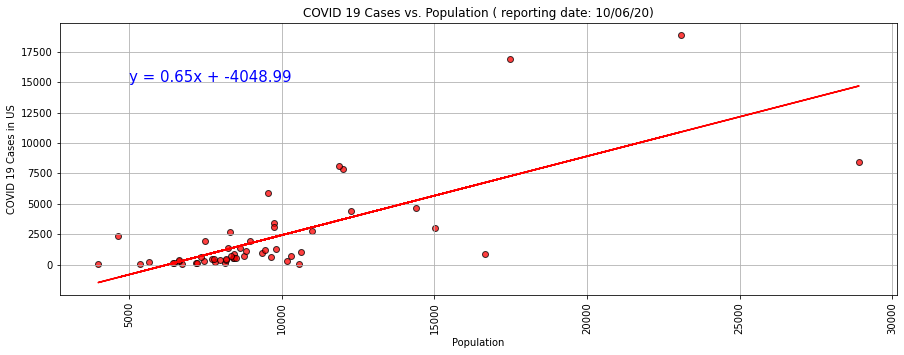

In [30]:



# Assign x_values, y_values
x_values = complete_data_us_population_df["Population"]
y_values = complete_data_us_population_df["Cases"]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Generate a scatter plot of US COVID 19 cases versus Population
plt.scatter(x_values, y_values,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (5000,15000), fontsize=15, color="blue")

# Print r-squared value
#print(f"The r-value is: {rvalue}")

# Print equation of the regression line
#print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Population ( reporting date: " + str(reporting_date) + ")")
plt.xlabel("Population")
plt.ylabel("COVID 19 Cases in US")
plt.grid()

# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPopulation.png")
plt.show()


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for cases and population
correlation = st.pearsonr(complete_data_us_population_df["Per Capita Income"],
                          complete_data_us_population_df["Cases"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.41


The r-value is: 0.40929390552672285
The equation of the regression line is: y = 0.29x + -6432.79


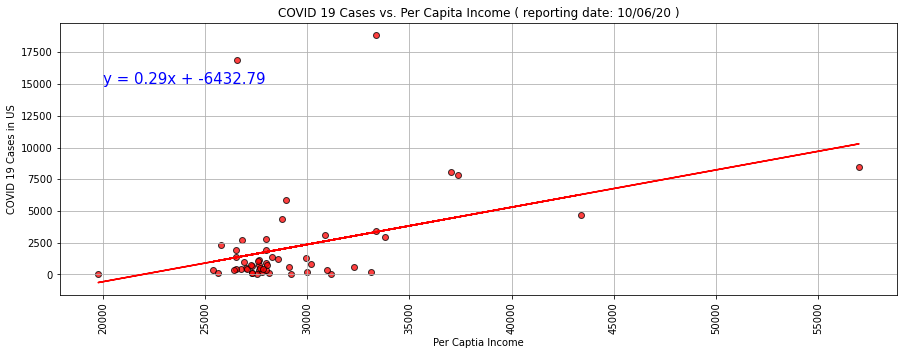

In [32]:
# General population 
complete_data_us_per_capita_df = complete_data_us_state_df

# Assign x_values, y_values
x_values = complete_data_us_per_capita_df["Per Capita Income"]
y_values = complete_data_us_per_capita_df["Cases"]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

# Generate a scatter plot of US COVID 19 cases versus Population
plt.scatter(x_values, y_values,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (20000,15000), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita Income ( reporting date: " + str(reporting_date) + " )")
plt.xlabel("Per Captia Income")
plt.ylabel("COVID 19 Cases in US")
plt.grid()

# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCapitaIncome.png")
plt.show()


In [33]:
# Sort and display the five best states

bottom_five_states_df = complete_data_us_state_df.sort_values(by="Cases", ascending = True).iloc[:5,:]

# Set data frame index name to None

bottom_five_states_df.index.name = None

bottom_five_states_df["Cases"] = bottom_five_states_df["Cases"].astype(float)
bottom_five_states_df["Cases"] = bottom_five_states_df["Cases"].apply(np.floor)
bottom_five_states_df["Morbidity"] = bottom_five_states_df["Morbidity"].astype(float)
bottom_five_states_df["Morbidity"] = bottom_five_states_df["Morbidity"].apply(np.floor)
bottom_five_states_df["Population"] = bottom_five_states_df["Population"].astype(float)
bottom_five_states_df["Population"] = bottom_five_states_df["Population"].apply(np.floor)
bottom_five_states_df["Household Income"] = bottom_five_states_df["Household Income"].astype(float)
bottom_five_states_df["Household Income"] = bottom_five_states_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
bottom_five_states_df["Median Age"] = bottom_five_states_df["Median Age"].astype(float)
bottom_five_states_df["Median Age"] = bottom_five_states_df["Median Age"].apply(np.floor)
bottom_five_states_df["Per Capita Income"] = bottom_five_states_df["Per Capita Income"].astype(float)
bottom_five_states_df["Per Capita Income"] = bottom_five_states_df["Per Capita Income"].apply(np.floor)
bottom_five_states_df["Poverty Count"] = bottom_five_states_df["Poverty Count"].apply(np.floor)


# Display to output
bottom_five_states_df

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
26,Montana,50.0,0.0,6738.0,43.0,52477.0,27531.0,936.0,13.883359
46,Vermont,53.0,2.0,10578.0,43.0,61435.0,31151.0,1433.0,12.227584
1,Alaska,62.0,0.0,3984.0,33.0,48505.0,19750.0,443.0,25.587235
52,Wyoming,70.0,0.0,5355.0,43.0,56568.0,29219.0,628.0,12.517603
50,West Virginia,104.0,3.0,6439.0,43.0,49869.0,25608.0,1028.0,15.108640


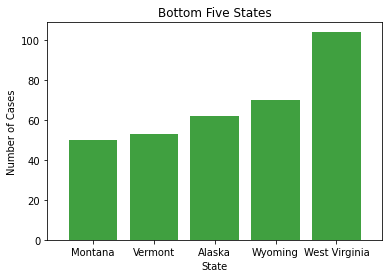

In [34]:
# Bar Graph Bottom Five States
cases = bottom_five_states_df["Cases"].to_list()
states = bottom_five_states_df["State"].to_list()
x_axis = np.arange(len(states))
plt.bar(x_axis, cases, color='g', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(cases)+5)
plt.title("Bottom Five States")
plt.xlabel("State")
plt.ylabel("Number of Cases")
# Save the figure
plt.savefig("../PyCovid19/images/BarBottomFiveStates.png")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

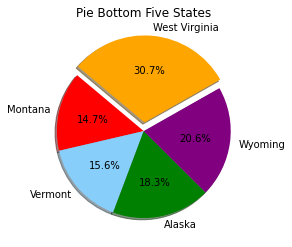

In [35]:
# Pie Chart Bottom Five States
# Labels for the sections of our pie chart
labels = states
# The values of each section of the pie chart
sizes = cases
# The colors of each section of the pie chart
colors = ["red","lightskyblue", "green", "purple","orange"]
explode = [0, 0, 0, 0, 0.1]
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Pie Bottom Five States')
plt.savefig("../PyCovid19/images/PieBottomFiveStates.png")
plt.show

In [1]:
# Change State to Bottom State
complete_data_us_bottom_state_df = complete_data_us_county_df[complete_data_us_county_df["State"] == "Montana"]
x = complete_data_us_bottom_state_df["Population"]
y = complete_data_us_bottom_state_df["Cases"]
# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (20000,100), fontsize=15, color="blue")


# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")


# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita Income (State = Montana, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Per Capita Income")
plt.ylabel("Total COVID 19 Cases in Nebraska")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCaptiaIncomeMontana.png")
plt.show()

NameError: name 'complete_data_us_county_df' is not defined

In [37]:
# Sort and display the five worst states

top_five_states_df = complete_data_us_state_df.sort_values(by="Cases", ascending = False).iloc[:5,:]

# Set data frame index name to None

top_five_states_df.index.name = None

# Display to output
top_five_states_df


top_five_states_df["Cases"] = top_five_states_df["Cases"].astype(float)
top_five_states_df["Cases"] = top_five_states_df["Cases"].apply(np.floor)
top_five_states_df["Morbidity"] = top_five_states_df["Morbidity"].astype(float)
top_five_states_df["Morbidity"] = top_five_states_df["Morbidity"].apply(np.floor)
top_five_states_df["Population"] = top_five_states_df["Population"].astype(float)
top_five_states_df["Population"] = top_five_states_df["Population"].apply(np.floor)
top_five_states_df["Household Income"] = top_five_states_df["Household Income"].astype(float)
top_five_states_df["Household Income"] = top_five_states_df["Household Income"].apply(np.floor)
#complete_data_us_state_df["Population"] = complete_data_us_state_df["Population"].map("{:.0f}".format)
top_five_states_df["Median Age"] = top_five_states_df["Median Age"].astype(float)
top_five_states_df["Median Age"] = top_five_states_df["Median Age"].apply(np.floor)
top_five_states_df["Per Capita Income"] = top_five_states_df["Per Capita Income"].astype(float)
top_five_states_df["Per Capita Income"] = top_five_states_df["Per Capita Income"].apply(np.floor)
top_five_states_df["Poverty Count"] = top_five_states_df["Poverty Count"].apply(np.floor)

top_five_states_df

,State,Cases,Morbidity,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
4,California,18831.0,466.0,23088.0,40.0,66861.0,33349.0,3498.0,14.775083
2,Arizona,16918.0,371.0,17483.0,42.0,51243.0,26560.0,2885.0,18.452413
8,District of Columbia,8436.0,401.0,28907.0,36.0,85764.0,57017.0,4822.0,14.767912
30,New Jersey,8071.0,641.0,11865.0,43.0,76106.0,37051.0,1262.0,9.820679
21,Massachusetts,7842.0,534.0,12001.0,43.0,74278.0,37393.0,1347.0,10.284800


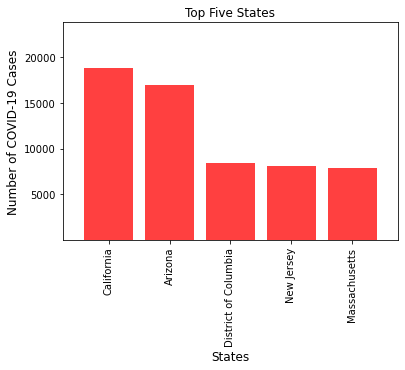

In [38]:
# Bar graph for top 5 states and case count
top_states_case_count = top_five_states_df["Cases"].to_list()
top_states = top_five_states_df["State"].to_list()
x_axis = np.arange(len(top_states_case_count))
plt.bar(x_axis, top_states_case_count, color='r', alpha=0.75, align="center")
ticks = [value for value in x_axis]
#plt.figure(figsize=(20,5))
plt.xticks(ticks, top_states, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(1.0, max(top_states_case_count) + 5000)
plt.title('Top Five States')
plt.ylabel('Number of COVID-19 Cases', fontsize=12)
plt.xlabel('States', fontsize=12)
# Save the figure
plt.savefig("../PyCovid19/images/BarTopFiveStates.png")
plt.show()


The r-value is: 0.07660812861429431
The equation of the regression line is: y = 0.1x + 1539.94


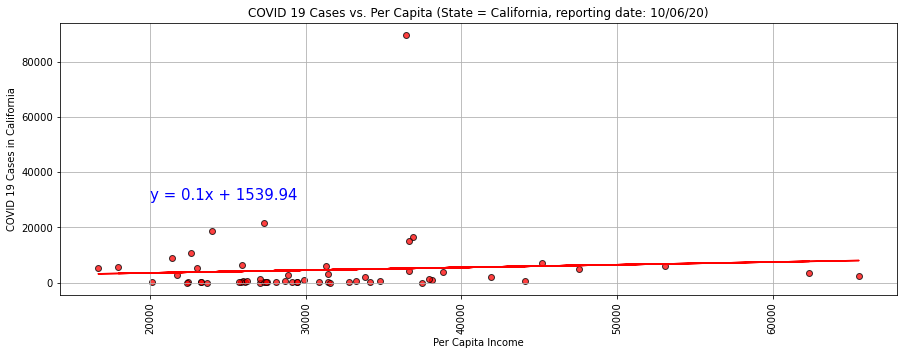

In [58]:
# Change State to Top State
complete_data_us_top_state_df = complete_data_us_county_df[complete_data_us_county_df["State"] == "California"]
x = complete_data_us_top_state_df["Per Capita Income"]
y = complete_data_us_top_state_df["Cases"]

# Assign linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Assign line equation values
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
# Generate a scatter plot of US COVID 19 cases versus Max Temperature
plt.scatter(x, y,
    marker='o',
    facecolors='dodgerblue',
    edgecolors='black',
    c='red',
    alpha=.75)

# Plot regression line
plt.plot(x, regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (20000,30000), fontsize=15, color="blue")

# Print r-squared value
print(f"The r-value is: {rvalue}")

# Print equation of the regression line
print(f"The equation of the regression line is: {line_eq}")

# Assign title, x label, and y label for our chart
plt.title(f"COVID 19 Cases vs. Per Capita (State = California, reporting date: " + str(reporting_date) + ")")
plt.xlabel("Per Capita Income")
plt.ylabel("COVID 19 Cases in California")
plt.grid()
# Save the figure
plt.savefig("../PyCovid19/images/COVID19CasesPerCapitaIncomeCalifornia.png")
plt.show()

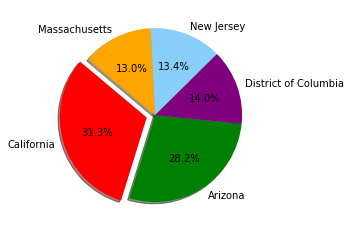

In [40]:
# Pie chart for top 5 states and case count
labels = top_states
sizes = top_states_case_count
colors = ["red", "green", "purple", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save the figure
plt.savefig("../PyCovid19/images/PieTopFiveStates.png")
plt.show()